## This code takes the .npz file from TweetyBERT, as well as the surgery date from the bird's creation_data .json file, then color-codes data from pre versus post treatment (e.g. surgery, DOI injection).

### Load the .npz file and the .json file, extract the animal_id, treatment_date, and treatmetn_type (to be used in the graph titles later)

In [1]:
import re
import numpy as np
import json

# Paths to the .npz and .json files
path_to_npz_file_from_TweetyBERT = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508.npz'
path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508_creation_data.json'

# Use a regular expression to find the pattern 'USA' followed by 4 digits for the animal ID
match = re.search(r"(USA\d{4})", path_to_npz_file_from_TweetyBERT)
if match:
    animal_id = match.group(1)
    print(f"Animal ID: {animal_id}")
else:
    print("Animal ID not found in the file path.")

# Load the JSON file and extract the treatment date
with open(path_to_json_file_with_dates, 'r') as file:
    json_data = json.load(file)

# Extract and print the treatment date
treatment_date = json_data.get("treatment_date", "Treatment date not found")
treatment_type = json_data.get("treatment_type", "Treatment type not found")
print(f"Treatment Date: {treatment_date}")
print(f"Treatment Type: {treatment_type}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Animal ID: USA5508
Treatment Date: 2024-10-21
Treatment Type: DOI 10mg/kg


## Adjust the dictionary to include the date of the recording.

In [ ]:
import numpy as np
import json

# Paths to the files
path_to_npz_file_from_TweetyBERT = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508.npz'
path_to_json_file = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508_creation_data.json'

# Load the .npz file
data = np.load(path_to_npz_file_from_TweetyBERT, allow_pickle=True)

# Extract the dictionary
file_map_dictionary = data['file_map'].item()

# Load the creation_data.json
with open(path_to_json_file, 'r') as json_file:
    creation_data = json.load(json_file)

# Extract the year from 'treatment_date'
treatment_date = creation_data.get('treatment_date')
if treatment_date is None:
    raise ValueError("Treatment date not found in creation_data.")

# Parse the year from the 'treatment_date'
year = treatment_date.split('-')[0]

# Iterate over each key in the file_map_dictionary
for key in file_map_dictionary.keys():
    # Get the filename tuple
    filename_tuple = file_map_dictionary[key]
    
    # Extract the filename string
    sample_file_name = filename_tuple[0]
    
    # Split the string by underscores
    parts = sample_file_name.split('_')
    
    # Extract date and time components
    try:
        month = parts[2]  # '10' - October
        day = parts[3]    # '8'
        hour = parts[4]   # '12'
        minute = parts[5] # '33'
    except IndexError:
        print(f"Error: Filename parts do not have enough components for key {key}. Skipping.")
        continue  # Skip to the next key
    
    # Ensure all components are two digits
    month = month.zfill(2)
    day = day.zfill(2)
    hour = hour.zfill(2)
    minute = minute.zfill(2)
    
    # Validate numeric ranges
    try:
        hour_int = int(hour)
        minute_int = int(minute)
        if not (0 <= hour_int < 24):
            print(f"Invalid hour value: {hour_int} for key {key}. Skipping.")
            continue  # Skip to the next key
        if not (0 <= minute_int < 60):
            print(f"Invalid minute value: {minute_int} for key {key}. Skipping.")
            continue  # Skip to the next key
    except ValueError:
        print(f"Invalid numeric value in date components for key {key}. Skipping.")
        continue  # Skip to the next key
    
    # Create datetime string
    datetime_str = f"{year}-{month}-{day}T{hour}:{minute}"
    
    # Convert to NumPy datetime64
    datetime_np = np.datetime64(datetime_str)
    
    # Update the tuple to include datetime_np
    new_tuple = filename_tuple + (datetime_np,)
    
    # Update the dictionary
    file_map_dictionary[key] = new_tuple

# Now, file_map_dictionary has updated tuples with datetime included

# Optional: To verify the updates, you can print the updated file_map_dictionary
for key, value in file_map_dictionary.items():
    print(f"Key: {key}, Value: {value}")

# Corrected variable name
print(file_map_dictionary)

Key: 0, Value: ('USA5508_45573.45203030_10_8_12_33_23_segment_1.npz', numpy.datetime64('2024-10-08T12:33'))
Key: 1, Value: ('USA5508_45584.42271438_10_19_11_44_31_segment_0.npz', numpy.datetime64('2024-10-19T11:44'))
Key: 2, Value: ('USA5508_45572.25626471_10_7_7_7_6_segment_1.npz', numpy.datetime64('2024-10-07T07:07'))
Key: 3, Value: ('USA5508_45552.32497383_9_17_9_1_37_segment_8.npz', numpy.datetime64('2024-09-17T09:01'))
Key: 4, Value: ('USA5508_45592.48059161_10_27_13_20_59_segment_0.npz', numpy.datetime64('2024-10-27T13:20'))
Key: 5, Value: ('USA5508_45592.42700090_10_27_11_51_40_segment_0.npz', numpy.datetime64('2024-10-27T11:51'))
Key: 6, Value: ('USA5508_45571.62688063_10_6_17_24_48_segment_0.npz', numpy.datetime64('2024-10-06T17:24'))
Key: 7, Value: ('USA5508_45592.27338824_10_27_7_35_38_segment_2.npz', numpy.datetime64('2024-10-27T07:35'))
Key: 8, Value: ('USA5508_45571.41715667_10_6_11_35_15_segment_1.npz', numpy.datetime64('2024-10-06T11:35'))
Key: 9, Value: ('USA5508_45576

### Now, make an organized table that contains the date of the recording, and the point in UMAP space. This will require iterating through each coordinate, finding the corresonding file_index, then using that to get the file name and date from the updated file_map_dictionary.

In [25]:
import numpy as np
import datetime

# Let's start out by doing this all for the first data point.
sample_index = 0
UMAP_space_coordinate = data['embedding_outputs'][sample_index]
print(f"UMAP Space Coordinate: {UMAP_space_coordinate}")

# Find the corresponding file_index value
sample_file_index = data['file_indices'][sample_index]
print(f"Sample File Index: {sample_file_index}")

# Use that as the key to find the filename and date
corresponding_file_map_dictionary_entry = file_map_dictionary[sample_file_index]
print(f"Corresponding File Map Entry: {corresponding_file_map_dictionary_entry}")

# Extract the numpy.datetime64 object
corresponding_date_time = corresponding_file_map_dictionary_entry[1]
print(f"Corresponding Date Time: {corresponding_date_time}")

# Convert numpy.datetime64 to datetime.datetime
datetime_obj = corresponding_date_time.astype('datetime64[s]').astype(datetime.datetime)

# Extract the date
corresponding_date = datetime_obj.date()
print(f"Corresponding Date: {corresponding_date}")


UMAP Space Coordinate: [4.8872333 9.030096 ]
Sample File Index: 0
Corresponding File Map Entry: ('USA5508_45573.45203030_10_8_12_33_23_segment_1.npz', numpy.datetime64('2024-10-08T12:33'))
Corresponding Date Time: 2024-10-08T12:33
Corresponding Date: 2024-10-08


In [29]:
import numpy as np
import pandas as pd

# Assuming 'data' and 'file_map_dictionary' are already loaded as per your previous code.

# Convert file_map_dictionary to a DataFrame
file_map_df = pd.DataFrame.from_dict(file_map_dictionary, orient='index')

# Reset the index to ensure it aligns with sample_file_indices
file_map_df.reset_index(inplace=True)
file_map_df.rename(columns={'index': 'file_index'}, inplace=True)

# Extract the necessary columns
# Assuming the datetime is in the second position (column 1)
file_map_df = file_map_df[[0, 1]]
file_map_df.columns = ['Filename', 'DateTime']

# Extract the sample file indices as a numpy array
sample_file_indices = data['file_indices']

# Create a DataFrame for the sample file indices
sample_df = pd.DataFrame({'file_index': sample_file_indices})

# Merge the sample_df with file_map_df on 'file_index' to get the DateTime
merged_df = sample_df.merge(file_map_df, left_on='file_index', right_index=True, how='left')

# Extract the dates (convert numpy.datetime64 to date)
merged_df['Date'] = merged_df['DateTime'].values.astype('datetime64[D]')

# Assign the UMAP coordinates directly
merged_df['Coordinate'] = list(data['embedding_outputs'])

# Select only the necessary columns
final_df = merged_df[['Date', 'Coordinate']]

# Reset index if needed
final_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(final_df.head(10))


        Date                Coordinate
0 2024-10-08     [4.8872333, 9.030096]
1 2024-10-08     [4.8899403, 9.030339]
2 2024-10-08      [4.897041, 9.032727]
3 2024-10-08       [4.907329, 9.03269]
4 2024-10-08  [-4.4784927, -1.7402201]
5 2024-10-08  [-4.2899466, -1.6872147]
6 2024-10-08  [-3.5733035, -1.3613567]
7 2024-10-08  [-3.2076657, -1.2494345]
8 2024-10-08  [-2.8787663, -1.1943392]
9 2024-10-08     [-2.7888432, -1.4493]


## Now, plot the data:

In [47]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'final_df' is your DataFrame with 'Date' and 'Coordinate' columns

# # Convert the 'Coordinate' column into separate 'X' and 'Y' columns
# coordinates = pd.DataFrame(final_df['Coordinate'].tolist(), columns=['X', 'Y'])
# final_df = final_df.join(coordinates)

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=final_df, x='X', y='Y', hue='Date', palette='viridis', s=50)

# # Customize the plot
# plt.title('Scatter Plot of Coordinates')
# plt.xlabel('UMAP Coordinate X')
# plt.ylabel('UMAP Coordinate Y')
# plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Show the plot
# plt.show()


In [48]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# # Assuming 'final_df' is your DataFrame with 'Date' and 'Coordinate' columns

# # Ensure the 'Date' column is in datetime format
# final_df['Date'] = pd.to_datetime(final_df['Date'])

# # Convert the 'Coordinate' column into separate 'X' and 'Y' columns
# coordinates = pd.DataFrame(final_df['Coordinate'].tolist(), columns=['X', 'Y'])

# # Overwrite existing 'X' and 'Y' columns in 'final_df'
# final_df[['X', 'Y']] = coordinates

# # Define the cutoff date
# cutoff_date = pd.to_datetime('2024-10-21')

# # Assign colors based on the date
# final_df['Color'] = final_df['Date'].apply(lambda x: 'blue' if x < cutoff_date else 'red')

# # Create the scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(final_df['X'], final_df['Y'], c=final_df['Color'])

# # Customize the plot
# plt.title('')
# plt.xlabel('UMAP Dimension 1', fontsize = 24)
# plt.ylabel('UMAP Dimension 2', fontsize = 24)
# plt.tight_layout()

# # Create custom legend
# blue_patch = mpatches.Patch(color='blue', label='Before Treatment')
# red_patch = mpatches.Patch(color='red', label='On or After 2024-10-21')
# plt.legend(handles=[blue_patch, red_patch], loc='upper right')

# # Show the plot
# plt.show()


In [49]:
# import re
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import json

# # Paths to the .npz and .json files
# path_to_npz_file_from_TweetyBERT = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508.npz'
# path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508_creation_data.json'

# # Use a regular expression to find the pattern 'USA' followed by 4 digits for the animal ID
# match = re.search(r"(USA\d{4})", path_to_npz_file_from_TweetyBERT)
# if match:
#     animal_id = match.group(1)
#     print(f"Animal ID: {animal_id}")
# else:
#     print("Animal ID not found in the file path.")

# # Load the JSON file and extract the treatment date and type
# with open(path_to_json_file_with_dates, 'r') as file:
#     json_data = json.load(file)

# treatment_date_str = json_data.get("treatment_date", "Treatment date not found")
# treatment_type = json_data.get("treatment_type", "Treatment type not found")
# print(f"Treatment Date: {treatment_date_str}")
# print(f"Treatment Type: {treatment_type}")

# # Convert treatment_date_str to datetime
# treatment_date = pd.to_datetime(treatment_date_str)

# # Assuming 'final_df' is your DataFrame with 'Date' and 'Coordinate' columns
# # Ensure 'final_df' is already defined from previous steps

# # Ensure the 'Date' column is in datetime format
# final_df['Date'] = pd.to_datetime(final_df['Date'])

# # Convert the 'Coordinate' column into separate 'X' and 'Y' columns
# # Overwrite existing 'X' and 'Y' columns if they exist
# coordinates = pd.DataFrame(final_df['Coordinate'].tolist(), columns=['X', 'Y'])
# final_df[['X', 'Y']] = coordinates

# # Define the cutoff date using treatment_date
# cutoff_date = treatment_date

# # Assign colors based on the date relative to the treatment date
# final_df['Color'] = final_df['Date'].apply(lambda x: 'blue' if x < cutoff_date else 'red')

# # Create the scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(final_df['X'], final_df['Y'], c=final_df['Color'])

# # Customize the plot
# title_text = f"{animal_id} - {treatment_type} on {treatment_date_str}"
# plt.title(title_text)
# plt.xlabel('UMAP Coordinate X')
# plt.ylabel('UMAP Coordinate Y')
# plt.tight_layout()

# # Create custom legend entries
# blue_patch = mpatches.Patch(color='blue', label=f'Before {treatment_type}')
# red_patch = mpatches.Patch(color='red', label=f'On or After {treatment_type}')
# plt.legend(handles=[blue_patch, red_patch], loc='upper right')

# # Show the plot
# plt.show()


In [50]:
# import re
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import json

# # Paths to the .npz and .json files
# path_to_npz_file_from_TweetyBERT = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508.npz'
# path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508_creation_data.json'

# # Use a regular expression to find the pattern 'USA' followed by 4 digits for the animal ID
# match = re.search(r"(USA\d{4})", path_to_npz_file_from_TweetyBERT)
# if match:
#     animal_id = match.group(1)
#     print(f"Animal ID: {animal_id}")
# else:
#     print("Animal ID not found in the file path.")

# # Load the JSON file and extract the treatment date and type
# with open(path_to_json_file_with_dates, 'r') as file:
#     json_data = json.load(file)

# treatment_date_str = json_data.get("treatment_date", "Treatment date not found")
# treatment_type = json_data.get("treatment_type", "Treatment type not found")
# print(f"Treatment Date: {treatment_date_str}")
# print(f"Treatment Type: {treatment_type}")

# # Convert treatment_date_str to datetime
# treatment_date = pd.to_datetime(treatment_date_str)

# # Assuming 'final_df' is your DataFrame with 'Date' and 'Coordinate' columns
# # Ensure 'final_df' is already defined from previous steps

# # Ensure the 'Date' column is in datetime format
# final_df['Date'] = pd.to_datetime(final_df['Date'])

# # Convert the 'Coordinate' column into separate 'X' and 'Y' columns
# # Overwrite existing 'X' and 'Y' columns if they exist
# coordinates = pd.DataFrame(final_df['Coordinate'].tolist(), columns=['X', 'Y'])
# final_df[['X', 'Y']] = coordinates

# # Define the cutoff date using treatment_date
# cutoff_date = treatment_date

# # Assign colors based on the date relative to the treatment date
# final_df['Color'] = final_df['Date'].apply(lambda x: 'blue' if x < cutoff_date else 'red')

# # Create the scatter plot with increased transparency
# plt.figure(figsize=(10, 6))
# plt.scatter(final_df['X'], final_df['Y'], c=final_df['Color'], alpha=0.3)

# # Customize the plot
# title_text = f"{animal_id} - {treatment_type} on {treatment_date_str}"
# plt.title(title_text)
# plt.xlabel('UMAP Coordinate X')
# plt.ylabel('UMAP Coordinate Y')
# plt.tight_layout()

# # Create custom legend entries
# blue_patch = mpatches.Patch(color='blue', label=f'Before {treatment_type}')
# red_patch = mpatches.Patch(color='red', label=f'On or After {treatment_type}')
# plt.legend(handles=[blue_patch, red_patch], loc='upper right')

# # Show the plot
# plt.show()


Animal ID: USA5508
Treatment Date: 2024-10-21
Treatment Type: DOI 10mg/kg


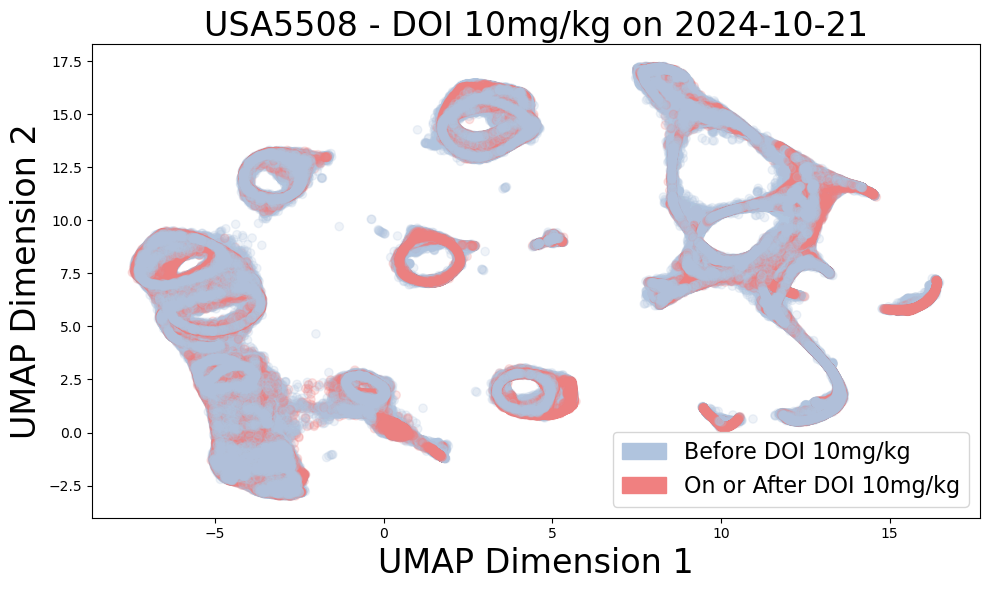

In [41]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

# Paths to the .npz and .json files
path_to_npz_file_from_TweetyBERT = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508.npz'
path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508_creation_data.json'

# Use a regular expression to find the pattern 'USA' followed by 4 digits for the animal ID
match = re.search(r"(USA\d{4})", path_to_npz_file_from_TweetyBERT)
if match:
    animal_id = match.group(1)
    print(f"Animal ID: {animal_id}")
else:
    print("Animal ID not found in the file path.")

# Load the JSON file and extract the treatment date and type
with open(path_to_json_file_with_dates, 'r') as file:
    json_data = json.load(file)

treatment_date_str = json_data.get("treatment_date", "Treatment date not found")
treatment_type = json_data.get("treatment_type", "Treatment type not found")
print(f"Treatment Date: {treatment_date_str}")
print(f"Treatment Type: {treatment_type}")

# Convert treatment_date_str to datetime
treatment_date = pd.to_datetime(treatment_date_str)

# Assuming 'final_df' is your DataFrame with 'Date' and 'Coordinate' columns
# Ensure 'final_df' is already defined from previous steps

# Ensure the 'Date' column is in datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Convert the 'Coordinate' column into separate 'X' and 'Y' columns
# Overwrite existing 'X' and 'Y' columns if they exist
coordinates = pd.DataFrame(final_df['Coordinate'].tolist(), columns=['X', 'Y'])
final_df[['X', 'Y']] = coordinates

# Define the cutoff date using treatment_date
cutoff_date = treatment_date

# Assign muted colors based on the date relative to the treatment date
# Use lighter shades of blue and red
final_df['Color'] = final_df['Date'].apply(lambda x: 'lightsteelblue' if x < cutoff_date else 'lightcoral')

# Create the scatter plot with increased transparency
plt.figure(figsize=(10, 6))
plt.scatter(final_df['X'], final_df['Y'], c=final_df['Color'], alpha=0.2)

# Customize the plot
title_text = f"{animal_id} - {treatment_type} on {treatment_date_str}"
plt.title(title_text, fontsize = 24)
plt.xlabel('UMAP Dimension 1', fontsize = 24)
plt.ylabel('UMAP Dimension 2', fontsize = 24)
plt.tight_layout()

# Create custom legend entries with the new colors
lightblue_patch = mpatches.Patch(color='lightsteelblue', label=f'Before {treatment_type}')
lightcoral_patch = mpatches.Patch(color='lightcoral', label=f'On or After {treatment_type}')
plt.legend(handles=[lightblue_patch, lightcoral_patch], loc='lower right', fontsize = 16)

# Show the plot
plt.show()


## Adjust the plot to be a heatmap instead of a scatterplot, so we can see the overlap better.

In [42]:
# #code from Tim to use as a reference:

# x = data[:,0]
# y = data[:,1]
# heatmap, xedges, yedges = np.histogram2d(x, y, bins=300)
# # Normalize the heatmap values
# heatmap = heatmap / heatmap.max()
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.clf()
# fig, ax = plt.subplots(figsize=(8, 8))
# # Use a brighter colormap and adjust the maximum value
# plt.imshow(heatmap.T*4, extent=extent, origin='lower', cmap='cubehelix', vmax=0.1)

# plt.show()

# #Note from Tim:
# #--- also - when comparing two different parameters in comparison graphs, we should have the same number of points - so for windowed UMAP vs single time bin, the hop size in overlap should be 1 time bin, 
# #so you have the same number of points at the end of the day.

Animal ID: USA5508
Treatment Date: 2024-10-21
Treatment Type: DOI 10mg/kg


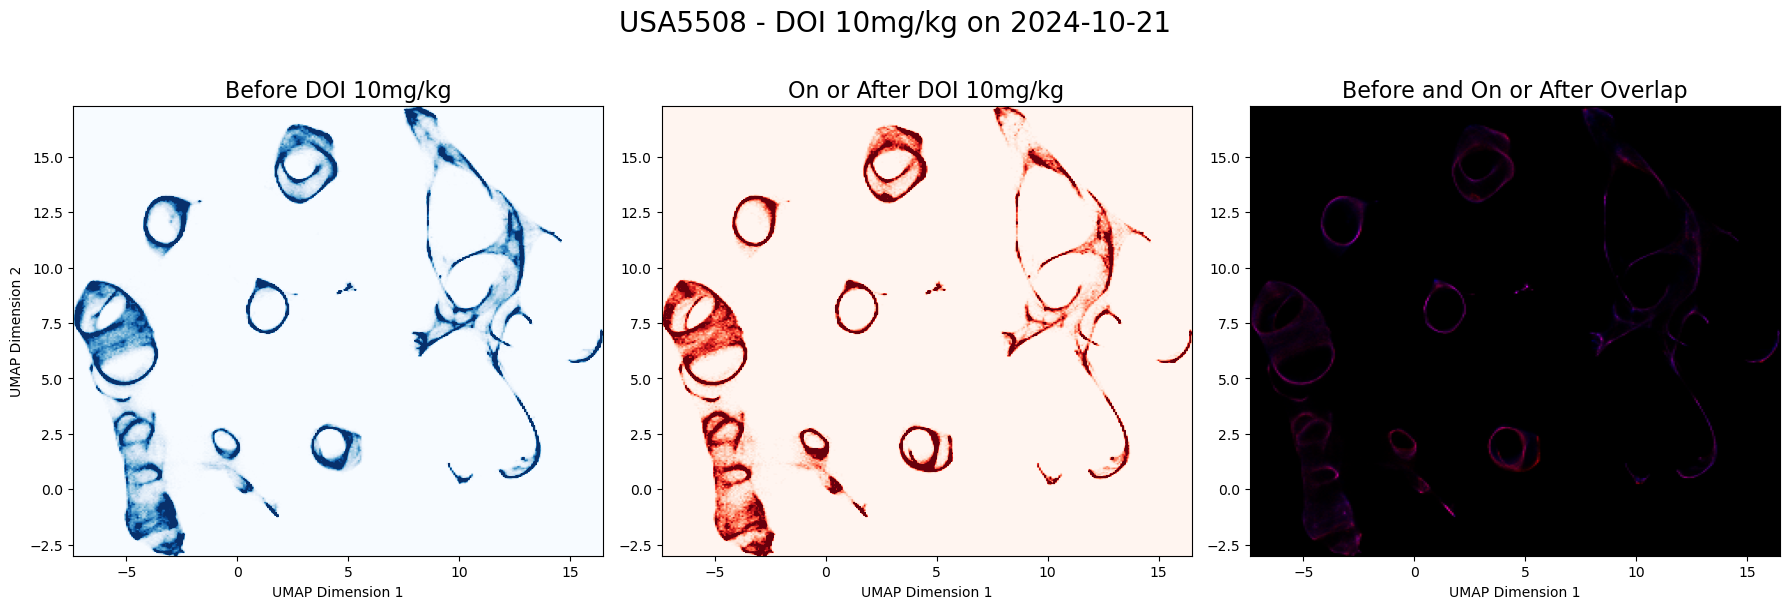

In [45]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Paths to the .npz and .json files
path_to_npz_file_from_TweetyBERT = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508.npz'
path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508_creation_data.json'

# Extract the animal ID using regex
match = re.search(r"(USA\d{4})", path_to_npz_file_from_TweetyBERT)
if match:
    animal_id = match.group(1)
    print(f"Animal ID: {animal_id}")
else:
    print("Animal ID not found in the file path.")

# Load the JSON file and extract treatment details
with open(path_to_json_file_with_dates, 'r') as file:
    json_data = json.load(file)

treatment_date_str = json_data.get("treatment_date", "Treatment date not found")
treatment_type = json_data.get("treatment_type", "Treatment type not found")
print(f"Treatment Date: {treatment_date_str}")
print(f"Treatment Type: {treatment_type}")

# Convert treatment date to datetime
treatment_date = pd.to_datetime(treatment_date_str)

# Assuming 'final_df' is your DataFrame with 'Date' and 'Coordinate' columns
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Split 'Coordinate' column into 'X' and 'Y'
coordinates = pd.DataFrame(final_df['Coordinate'].tolist(), columns=['X', 'Y'])
final_df[['X', 'Y']] = coordinates

# Filter coordinates based on treatment date
before_treatment = final_df[final_df['Date'] < treatment_date]
after_treatment = final_df[final_df['Date'] >= treatment_date]

# Define bins for the heatmap
bins = 300

# Create a 2D histogram for data before treatment
heatmap_before, xedges, yedges = np.histogram2d(before_treatment['X'], before_treatment['Y'], bins=bins)

# Create a 2D histogram for data after treatment
heatmap_after, _, _ = np.histogram2d(after_treatment['X'], after_treatment['Y'], bins=[xedges, yedges])

# Normalize each heatmap independently
heatmap_before = heatmap_before / heatmap_before.max()
heatmap_after = heatmap_after / heatmap_after.max()

# Create an RGB image with blue and red channels for overlap visualization
rgb_image = np.zeros((heatmap_before.shape[0], heatmap_before.shape[1], 3))
rgb_image[..., 0] = heatmap_after.T  # Red channel for "On or After DOI"
rgb_image[..., 2] = heatmap_before.T  # Blue channel for "Before DOI"

# Plot the two heatmaps separately and the combined RGB plot
plt.figure(figsize=(18, 6))

# Plot for data before treatment
plt.subplot(1, 3, 1)
plt.imshow(heatmap_before.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='Blues', vmax=0.1)
plt.title(f"Before {treatment_type}", fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Plot for data after treatment
plt.subplot(1, 3, 2)
plt.imshow(heatmap_after.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='Reds', vmax=0.1)
plt.title(f"On or After {treatment_type}", fontsize=16)
plt.xlabel('UMAP Dimension 1')

# Plot combined RGB image
plt.subplot(1, 3, 3)
plt.imshow(rgb_image, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower')
plt.title("Before and On or After Overlap", fontsize=16)
plt.xlabel('UMAP Dimension 1')

# Main title and layout
plt.suptitle(f"{animal_id} - {treatment_type} on {treatment_date_str}", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


Animal ID: USA5508
Treatment Date: 2024-10-21
Treatment Type: DOI 10mg/kg


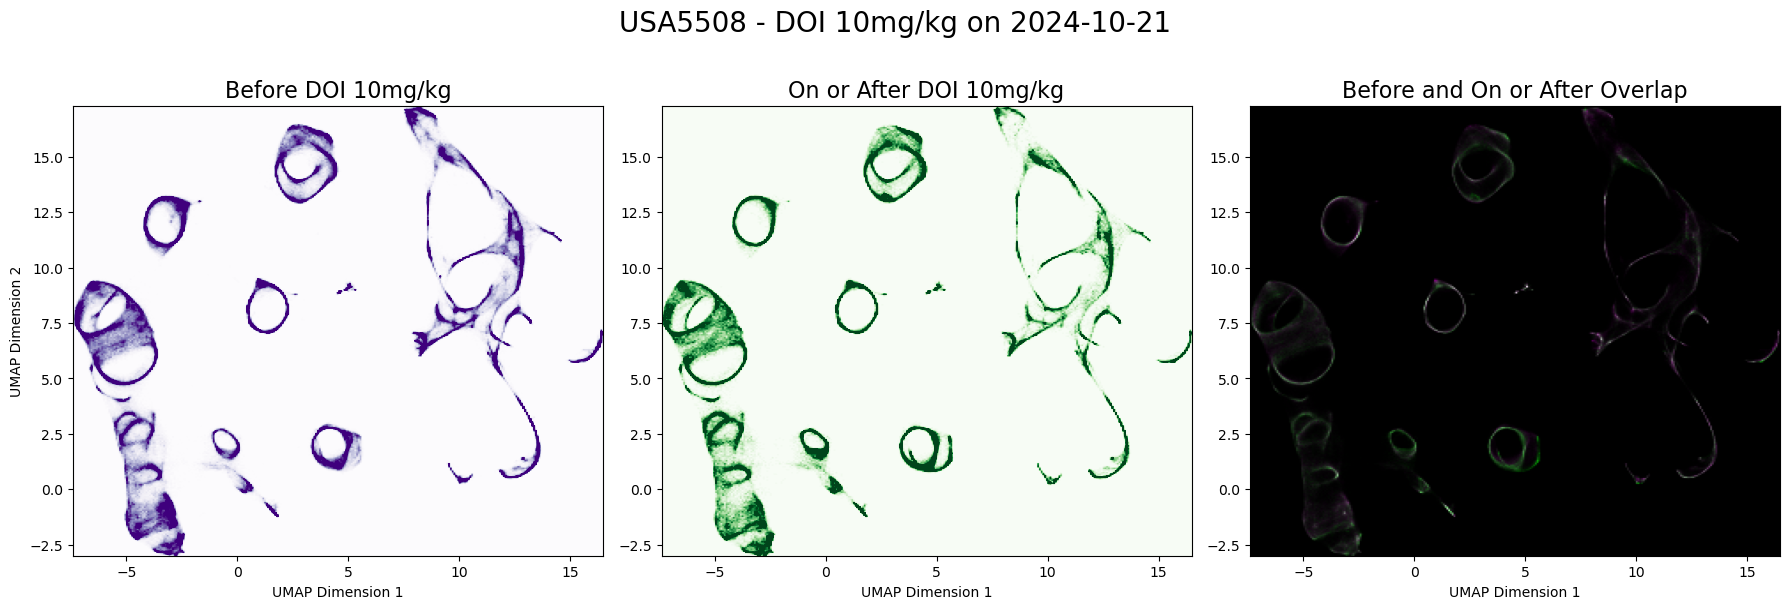

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Paths to the .npz and .json files
path_to_npz_file_from_TweetyBERT = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508.npz'
path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/DOI_USA5508/DOI_USA5508_creation_data.json'

# Extract the animal ID using regex
match = re.search(r"(USA\d{4})", path_to_npz_file_from_TweetyBERT)
if match:
    animal_id = match.group(1)
    print(f"Animal ID: {animal_id}")
else:
    print("Animal ID not found in the file path.")

# Load the JSON file and extract treatment details
with open(path_to_json_file_with_dates, 'r') as file:
    json_data = json.load(file)

treatment_date_str = json_data.get("treatment_date", "Treatment date not found")
treatment_type = json_data.get("treatment_type", "Treatment type not found")
print(f"Treatment Date: {treatment_date_str}")
print(f"Treatment Type: {treatment_type}")

# Convert treatment date to datetime
treatment_date = pd.to_datetime(treatment_date_str)

# Assuming 'final_df' is your DataFrame with 'Date' and 'Coordinate' columns
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Split 'Coordinate' column into 'X' and 'Y'
coordinates = pd.DataFrame(final_df['Coordinate'].tolist(), columns=['X', 'Y'])
final_df[['X', 'Y']] = coordinates

# Filter coordinates based on treatment date
before_treatment = final_df[final_df['Date'] < treatment_date]
after_treatment = final_df[final_df['Date'] >= treatment_date]

# Define bins for the heatmap
bins = 300

# Create a 2D histogram for data before treatment
heatmap_before, xedges, yedges = np.histogram2d(before_treatment['X'], before_treatment['Y'], bins=bins)

# Create a 2D histogram for data after treatment
heatmap_after, _, _ = np.histogram2d(after_treatment['X'], after_treatment['Y'], bins=[xedges, yedges])

# Normalize each heatmap independently
heatmap_before = heatmap_before / heatmap_before.max()
heatmap_after = heatmap_after / heatmap_after.max()

# Create an RGB image with purple and green channels for overlap visualization
rgb_image = np.zeros((heatmap_before.shape[0], heatmap_before.shape[1], 3))
rgb_image[..., 0] = heatmap_before.T  # Red channel for purple
rgb_image[..., 1] = heatmap_after.T   # Green channel for green
rgb_image[..., 2] = heatmap_before.T  # Blue channel for purple

# Plot the two heatmaps separately and the combined RGB plot
plt.figure(figsize=(18, 6))

# Plot for data before treatment
plt.subplot(1, 3, 1)
plt.imshow(heatmap_before.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='Purples', vmax=0.1)
plt.title(f"Before {treatment_type}", fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Plot for data after treatment
plt.subplot(1, 3, 2)
plt.imshow(heatmap_after.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='Greens', vmax=0.1)
plt.title(f"On or After {treatment_type}", fontsize=16)
plt.xlabel('UMAP Dimension 1')

# Plot combined RGB image
plt.subplot(1, 3, 3)
plt.imshow(rgb_image, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower')
plt.title("Before and On or After Overlap", fontsize=16)
plt.xlabel('UMAP Dimension 1')

# Main title and layout
plt.suptitle(f"{animal_id} - {treatment_type} on {treatment_date_str}", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()